#### IE0005: INTRODUCTION TO DATA SCIENCE AND ARTIFICIAL INTELLIGENCE

# How to Predict Which Factor Most Affects the Number of Victims in New York City's Traffic Accidents?


 Tutorial Group: EL07
* Group Name: Syntax_Error
* Members:
    1. Francis Nathan Wijaya (U2120951H)
    2. Matthew Dinata (U2120122G)
    3. Muhammad Afiq bin Edros (U2122587K)
    4. Nigel Loh Zhi Wei (U2122947F)
   
   
Dataset downloaded from Kaggle: NYC Traffic Accidents 2020

Source: https://www.kaggle.com/datasets/mysarahmadbhat/nyc-traffic-accidents

# Section A: Data Preparation

(Done by: Francis & Matthew)

## 1. Introduction and Raw Data Information

The United States of America is one of the most-populated country, currently ranking third in the world for total population with a total of over 330 million citizens. With 50 states in the country, the most populated city in the USA is New York City. Out of the 330 million people in the USA, New York City is home to 8.8 million people. Due to that, every so often traffic accidents occur in the busy country.

A huge city filled with big buildings and wide roads, most people there commute with their private motor vehicles. The total number of accidents in a single year perceived from the data, it is essential to understand which factor contributes most to these accidents in order for the government and police department to decide on the most optimal measurements and restrictions required.

The dataset was recorded from the New York City Police Department (NYPD) from January to August 2020. The data classifies information into a couple of categories, including time of day, street name, coordinates of location, contributing factors, vehicle types, etc. 

Our project aims to detect which one of these factors contained in the data correlates most with the number of victims caused by these accidents. The project explores the correlation of these factors and calculates the accuracy of the various data models to determine which model is most suitable for future predictions.

### 1.1 Installing packages

In [1]:
#!pip install plotly
#!pip install xgboost
#!pip install imbalanced-learn
#!pip install wordcloud

### 1.2 Importing Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import imblearn as imb
import xgboost as xgb

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from pandas import read_csv
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sb.set()

### 1.3 Importing Raw Dataset

In [3]:
accidentData = pd.read_csv('NYC_Accidents_2020.csv')

In [4]:
accidentData.info()
accidentData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

ZIP CODE      LATITUDE     LONGITUDE  NUMBER OF PERSONS INJURED  \
count  49134.000000  68935.000000  68935.000000               74881.000000   
mean   10913.681585     40.689825    -73.843376                   0.366555   
std      515.069483      1.233368      2.234881                   0.726178   
min    10000.000000      0.000000    -74.253006                   0.000000   
25%    10458.000000     40.667076    -73.958680                   0.000000   
50%    11210.000000     40.716885    -73.916850                   0.000000   
75%    11354.000000     40.789445    -73.862630                   1.000000   
max    11697.000000     40.912884      0.000000                  15.000000   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count              74881.000000                   74881.000000   
mean                   0.001923                       0.054740   
std                    0.047609                       0.237582   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    4.000000                       6.000000   

       NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
count                  74881.000000               74881.000000   
mean                       0.000748                   0.043709   
std                        0.027337                   0.209737   
min                        0.000000                   0.000000   
25%                        0.000000                   0.000000   
50%                        0.000000                   0.000000   
75%                        0.000000                   0.000000   
max                        1.000000                   3.000000   

       NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
count              74881.000000                74881.000000   
mean                   0.000120                    0.268105   
std                    0.010963                    0.691423   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
max                    1.000000                   15.000000   

       NUMBER OF MOTORIST KILLED  COLLISION_ID  
count               74881.000000  7.488100e+04  
mean                    0.001055  4.305762e+06  
std                     0.037073  2.171658e+04  
min                     0.000000  4.063247e+06  
25%                     0.000000  4.287041e+06  
50%                     0.000000  4.305812e+06  
75%                     0.000000  4.324545e+06  
max                     4.000000  4.343622e+06

In [5]:
accidentData

CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0      2020-08-29   15:40:00      BRONX   10466.0  40.892100 -73.833760   
1      2020-08-29   21:00:00   BROOKLYN   11221.0  40.690500 -73.919914   
2      2020-08-29   18:20:00        NaN       NaN  40.816500 -73.946556   
3      2020-08-29   00:00:00      BRONX   10459.0  40.824720 -73.892960   
4      2020-08-29   17:10:00   BROOKLYN   11203.0  40.649890 -73.933890   
...           ...        ...        ...       ...        ...        ...   
74876  2020-01-01   15:13:00      BRONX   10459.0  40.826810 -73.896510   
74877  2020-01-01   08:00:00   BROOKLYN   11235.0  40.582935 -73.959210   
74878  2020-01-01   11:36:00      BRONX   10461.0  40.848553 -73.830055   
74879  2020-01-01   01:45:00  MANHATTAN   10017.0  40.753624 -73.969440   
74880  2020-01-01   18:00:00     QUEENS   11367.0  40.726875 -73.830960   

                           LOCATION   ON STREET NAME CROSS STREET NAME  \
0         POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1        POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2        POINT (-73.946556 40.8165)         8 AVENUE               NaN   
3        POINT (-73.89296 40.82472)              NaN               NaN   
4        POINT (-73.93389 40.64989)              NaN               NaN   
...                             ...              ...               ...   
74876    POINT (-73.89651 40.82681)              NaN               NaN   
74877   POINT (-73.95921 40.582935)              NaN               NaN   
74878  POINT (-73.830055 40.848553)              NaN               NaN   
74879   POINT (-73.96944 40.753624)   EAST 48 STREET          2 AVENUE   
74880   POINT (-73.83096 40.726875)              NaN               NaN   

             OFF STREET NAME  ...   CONTRIBUTING FACTOR VEHICLE 2  \
0                        NaN  ...                     Unspecified   
1                        NaN  ...                     Unspecified   
2                        NaN  ...                             NaN   
3        1047 SIMPSON STREET  ...                     Unspecified   
4         4609 SNYDER AVENUE  ...                     Unspecified   
...                      ...  ...                             ...   
74876  1122 INTERVALE AVENUE  ...                             NaN   
74877     3401 GUIDER AVENUE  ...                     Unspecified   
74878      1810 MAHAN AVENUE  ...                     Unspecified   
74879                    NaN  ...  Driver Inattention/Distraction   
74880  70-25 PARK DRIVE EAST  ...  Driver Inattention/Distraction   

       CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                        Unspecified                    Unspecified   
4                                NaN                            NaN   
...                              ...                            ...   
74876                            NaN                            NaN   
74877                    Unspecified                            NaN   
74878                            NaN                            NaN   
74879                            NaN                            NaN   
74880                            NaN                            NaN   

       CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                                NaN       4342908   
1                                NaN       4343555   
2                                NaN       4343142   
3                                NaN       4343588   
4                                NaN       4342953   
...                              ...           ...   
74876                            NaN       4268088   
74877                            NaN       4267756   
74878                            NaN       426923

That's a great look at our data! Now, let's try to narrow down our selected categories (columns) to make our analysis more optimal and focused.

## 2. Removing Unfocused and Irrelevant Columns

### 2.1 Dropping of Columns

In [6]:
data = accidentData.drop(columns = ['BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'])
data.head()

CRASH DATE CRASH TIME  LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
0  2020-08-29   15:40:00  40.89210 -73.833760                          0   
1  2020-08-29   21:00:00  40.69050 -73.919914                          2   
2  2020-08-29   18:20:00  40.81650 -73.946556                          1   
3  2020-08-29   00:00:00  40.82472 -73.892960                          0   
4  2020-08-29   17:10:00  40.64989 -73.933890                          0   

    CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0             Passing Too Closely                   Unspecified   
1  Reaction to Uninvolved Vehicle                   Unspecified   
2                Backing Unsafely                           NaN   
3                    Unsafe Speed                   Unspecified   
4   Failure to Yield Right-of-Way                   Unspecified   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  
0                                Sedan  Station Wagon/Sport Utility Vehicle  
1                                Sedan                                Sedan  
2  Station Wagon/Sport Utility Vehicle                                  NaN  
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle  
4                                Sedan                                Sedan

### 2.2 Overview and Checking of Dropped Irrelevant Columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   LATITUDE                       68935 non-null  float64
 3   LONGITUDE                      68935 non-null  float64
 4   NUMBER OF PERSONS INJURED      74881 non-null  int64  
 5   CONTRIBUTING FACTOR VEHICLE 1  74577 non-null  object 
 6   CONTRIBUTING FACTOR VEHICLE 2  59285 non-null  object 
 7   VEHICLE TYPE CODE 1            74246 non-null  object 
 8   VEHICLE TYPE CODE 2            53638 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.1+ MB


Our data currently looks more focused with relevant categories to our analysis! We still have to check if there is any 'Null' or 'Nan' to remove empty data.

## 3. Removing Null Values

### 3.1 Heatmap Visualisation of Missing Data

CRASH DATE                           0
CRASH TIME                           0
LATITUDE                          5946
LONGITUDE                         5946
NUMBER OF PERSONS INJURED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2              21243
dtype: int64

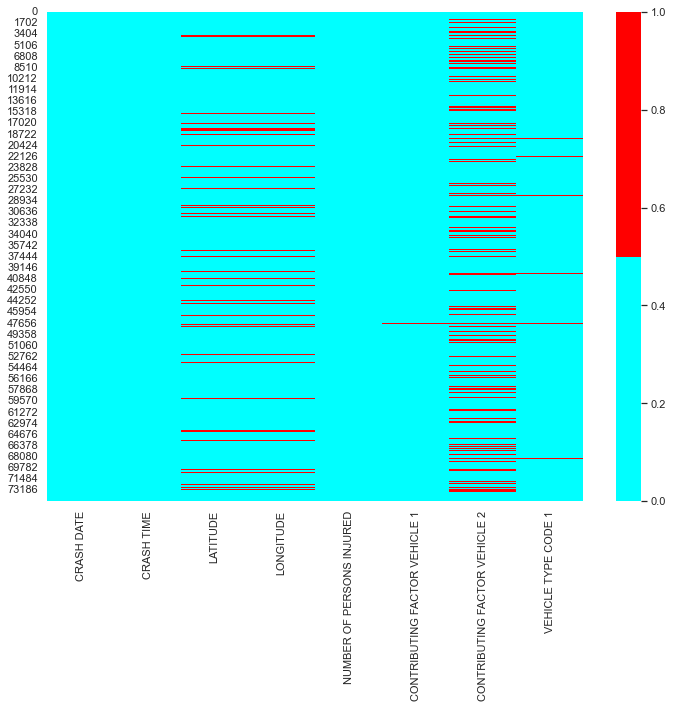

In [8]:
f, axes = plt.subplots(1, 1, figsize=(12, 9))
cols = data.columns[:8] 
colours = ['#00FFFF', '#FF0000']
sb.heatmap(data[cols].isnull(), cmap=sb.color_palette(colours))

data.isnull().sum()

Based on the heatmap above, the color cyan indicates `No Missing Values` while the color red indicates `Missing Values`. It can also be deduced that there indeed are missing values in our dataset. Let's clean them up!

### 3.2 Dropping all `Null` Values

In [9]:
data = data.dropna()

### 3.3 Overview and Checking of Dropped `Null` Values

In [10]:
data.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64

Awesome! Now we have no missing values in our dataset. After looking through manually, we discovered `Unspecified` data in the `CONTRIBUTING FACTOR VEHICLE 1` and `CONTRIBUTING FACTOR VEHICLE 2`. Since it gives no specific value, let's remove it.

## 4. Removing `Unspecified` Values

### 4.1 Dropping All `Unspecified` Values

In [11]:
cleanData = data[data.apply(lambda x: x['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified' and x['CONTRIBUTING FACTOR VEHICLE 2'] != 'Unspecified', axis=1)]

### 4.2 Overview and Checking of Dropped `Unspecified` Values

In [12]:
cleanData.info()
cleanData.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 11 to 74880
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     8193 non-null   object 
 1   CRASH TIME                     8193 non-null   object 
 2   LATITUDE                       8193 non-null   float64
 3   LONGITUDE                      8193 non-null   float64
 4   NUMBER OF PERSONS INJURED      8193 non-null   int64  
 5   CONTRIBUTING FACTOR VEHICLE 1  8193 non-null   object 
 6   CONTRIBUTING FACTOR VEHICLE 2  8193 non-null   object 
 7   VEHICLE TYPE CODE 1            8193 non-null   object 
 8   VEHICLE TYPE CODE 2            8193 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 640.1+ KB


LATITUDE    LONGITUDE  NUMBER OF PERSONS INJURED
count  8193.000000  8193.000000                8193.000000
mean     40.707910   -73.861720                   0.481387
std       1.104969     2.001044                   0.849044
min       0.000000   -74.240814                   0.000000
25%      40.677017   -73.961040                   0.000000
50%      40.736534   -73.924720                   0.000000
75%      40.806410   -73.869156                   1.000000
max      40.907820     0.000000                   8.000000

## 5. Conversion of `Crash Date` from String to DateTime

In [13]:
cleanData['CRASH DATE'] = pd.to_datetime(cleanData['CRASH DATE'])

The data type of  `Crash Date` is changed for data visualisation which will be proceeded below.

## 6. Optimization of Balance-Imbalanced Data

To know if our data is balanced or not, we need to know the percentages of our categories and if the difference between these percentages are close enough (approximately < 5%). Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Imbalanced classification is primarily challenging as a predictive modeling task because of the severely skewed class distribution. This is the cause for poor performance with traditional machine learning models and evaluation metrics that assume a balanced class distribution.

There are a lot of techniques to deal with imbalanced data, one of which is Oversampling which what we will use in our case. Oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique) 

### 6.1 Pie Chart Visualisation of Initial `Number Of Persons Injured`

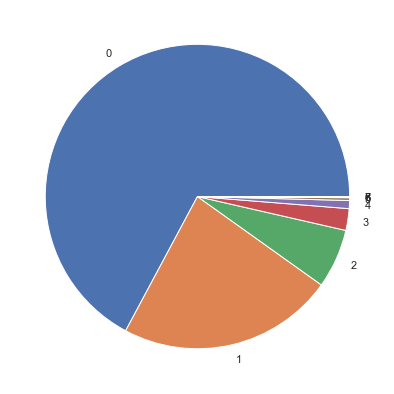

In [14]:
maxInjured = max(cleanData['NUMBER OF PERSONS INJURED'])

label = []
data = []
for i in range(0,maxInjured + 1):
    label.append(i)
    data.append(cleanData['NUMBER OF PERSONS INJURED'].value_counts()[i])

fig = plt.figure(figsize =(10,7))
plt.pie(data, labels = label)
 
plt.show()

The pie chart above shows that the raw data without balance-imbalancing techniques is extremely imbalanced with 0 `NUMBER OF PERSONS INJURED` takes over most of the percentage of the data

### 6.2 Over-Sampling of `NUMBER OF PERSONS INJURED`

In [15]:
X = cleanData
Y = cleanData['NUMBER OF PERSONS INJURED']

ros = RandomOverSampler(random_state=25)
data_resampled, y_resampled = ros.fit_resample(X, Y)
print(Counter(y_resampled))

data_resampled

Counter({0: 5504, 2: 5504, 1: 5504, 3: 5504, 7: 5504, 5: 5504, 4: 5504, 6: 5504, 8: 5504})


CRASH DATE CRASH TIME   LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
0     2020-08-29   14:00:00  40.704422 -73.792854                          0   
1     2020-08-29   12:29:00  40.861862 -73.912820                          2   
2     2020-08-29   10:35:00  40.710957 -73.951126                          1   
3     2020-08-29   19:00:00  40.839680 -73.929276                          1   
4     2020-08-29   05:40:00  40.858190 -73.884350                          0   
...          ...        ...        ...        ...                        ...   
49531 2020-02-13   08:25:00  40.665230 -73.931465                          8   
49532 2020-02-14   08:40:00  40.854744 -73.923510                          8   
49533 2020-02-13   08:25:00  40.665230 -73.931465                          8   
49534 2020-02-14   08:40:00  40.854744 -73.923510                          8   
49535 2020-02-14   08:40:00  40.854744 -73.923510                          8   

        CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2  \
0                   Oversized Vehicle             Passing Too Closely   
1                   Pavement Slippery         View Obstructed/Limited   
2      Driver Inattention/Distraction                 Other Vehicular   
3               Following Too Closely           Following Too Closely   
4                     Other Vehicular             Passing Too Closely   
...                               ...                             ...   
49531  Driver Inattention/Distraction  Driver Inattention/Distraction   
49532  Driver Inattention/Distraction  Driver Inattention/Distraction   
49533  Driver Inattention/Distraction  Driver Inattention/Distraction   
49534  Driver Inattention/Distraction  Driver Inattention/Distraction   
49535  Driver Inattention/Distraction  Driver Inattention/Distraction   

      VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  
0                     Bus  Station Wagon/Sport Utility Vehicle  
1           Pick-up Truck  Station Wagon/Sport Utility Vehicle  
2                   Sedan  Station Wagon/Sport Utility Vehicle  
3                   Sedan  Station Wagon/Sport Utility Vehicle  
4                   Sedan                                Sedan  
...                   ...                                  ...  
49531               Sedan  Station Wagon/Sport Utility Vehicle  
49532               Sedan                                Sedan  
49533               Sedan  Station Wagon/Sport Utility Vehicle  
49534               Sedan                                Sedan  
49535               Sedan                                Sedan  

[49536 rows x 9 columns]

As can be seen from the table, some data points are duplicated. This is because the data rows that has `NUMBER OF PERSONS INJURED` other than 0 will over-sample itself randomly until it reaches the same quantity as 0 `NUMBER OF PERSONS INJURED` data rows.

### 6.3 Pie Chart Visualisation of Resampled `NUMBER OF PERSONS INJURED`

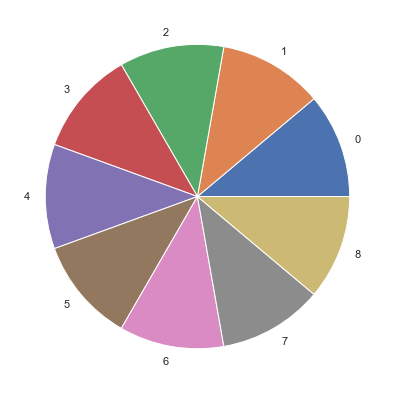

In [16]:
label = []
data = []
for i in range(0,maxInjured+1):
    label.append(i)
    data.append(data_resampled['NUMBER OF PERSONS INJURED'].value_counts()[i])


fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = label)
 
# show plot
plt.show()

Based on our pie chart, the number of data with each distinct `NUMBER OF PERSONS INJURED` is already balanced. Great!

### 6.4 Removal Of Random Data Rows

The removal of the data rows is to facilitate the efficiency of processing the data for our hardware.

In [17]:
np.random.seed(100)

remove_n = 25000
drop_indices = np.random.choice(data_resampled.index, remove_n, replace=False)
data_resampled_subset = data_resampled.drop(drop_indices)

print(Counter(data_resampled_subset['NUMBER OF PERSONS INJURED']))

data_resampled_subset

Counter({7: 2763, 2: 2753, 3: 2748, 4: 2748, 6: 2725, 0: 2722, 1: 2706, 5: 2699, 8: 2672})


CRASH DATE CRASH TIME   LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
0     2020-08-29   14:00:00  40.704422 -73.792854                          0   
1     2020-08-29   12:29:00  40.861862 -73.912820                          2   
3     2020-08-29   19:00:00  40.839680 -73.929276                          1   
4     2020-08-29   05:40:00  40.858190 -73.884350                          0   
9     2020-08-29   15:00:00  40.669518 -73.911934                          0   
...          ...        ...        ...        ...                        ...   
49528 2020-02-13   08:25:00  40.665230 -73.931465                          8   
49529 2020-02-14   08:40:00  40.854744 -73.923510                          8   
49530 2020-02-14   08:40:00  40.854744 -73.923510                          8   
49533 2020-02-13   08:25:00  40.665230 -73.931465                          8   
49534 2020-02-14   08:40:00  40.854744 -73.923510                          8   

        CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2  \
0                   Oversized Vehicle             Passing Too Closely   
1                   Pavement Slippery         View Obstructed/Limited   
3               Following Too Closely           Following Too Closely   
4                     Other Vehicular             Passing Too Closely   
9                     Other Vehicular                 Other Vehicular   
...                               ...                             ...   
49528  Driver Inattention/Distraction  Driver Inattention/Distraction   
49529  Driver Inattention/Distraction  Driver Inattention/Distraction   
49530  Driver Inattention/Distraction  Driver Inattention/Distraction   
49533  Driver Inattention/Distraction  Driver Inattention/Distraction   
49534  Driver Inattention/Distraction  Driver Inattention/Distraction   

                       VEHICLE TYPE CODE 1  \
0                                      Bus   
1                            Pick-up Truck   
3                                    Sedan   
4                                    Sedan   
9      Station Wagon/Sport Utility Vehicle   
...                                    ...   
49528                                Sedan   
49529                                Sedan   
49530                                Sedan   
49533                                Sedan   
49534                                Sedan   

                       VEHICLE TYPE CODE 2  
0      Station Wagon/Sport Utility Vehicle  
1      Station Wagon/Sport Utility Vehicle  
3      Station Wagon/Sport Utility Vehicle  
4                                    Sedan  
9      Station Wagon/Sport Utility Vehicle  
...                                    ...  
49528  Station Wagon/Sport Utility Vehicle  
49529                                Sedan  
49530                                Sedan  
49533  Station Wagon/Sport Utility Vehicle  
49534                                Sedan  

[24536 rows x 9 columns]

Based on the table above, the number of rows have decreased from the previous data table. The distribution of the data based on the `NUMBER OF PERSONS INJURED` is also still balanced.

# Section B: Data Visualisation

(Done By: Muh. Afiq & Nigel )

## 1. Location Coordinates Visualisation

### 1.1 Creating New DataFrame for Visualisation

In [18]:
plotData = data_resampled_subset[['LONGITUDE', 'LATITUDE']]
plotData

LONGITUDE   LATITUDE
0     -73.792854  40.704422
1     -73.912820  40.861862
3     -73.929276  40.839680
4     -73.884350  40.858190
9     -73.911934  40.669518
...          ...        ...
49528 -73.931465  40.665230
49529 -73.923510  40.854744
49530 -73.923510  40.854744
49533 -73.931465  40.665230
49534 -73.923510  40.854744

[24536 rows x 2 columns]

### 1.2 MapBox Visualisation of Location Coordinates

In [19]:
color_scale = [(0, 'yellow'), (1,'purple')]

fig = px.density_mapbox(plotData, lat='LATITUDE', lon='LONGITUDE',
                        mapbox_style="stamen-terrain", radius=10, opacity=0.5,
                       color_continuous_scale= [
                [0.0, "green"],
                [0.5, "green"],
                [0.51111111, "yellow"],
                [0.71111111, "yellow"],
                [0.71111112, "red"],
                [1, "red"]])

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


print("Scroll to zoom in or zoom out on the map.")

Scroll to zoom in or zoom out on the map.


<div>
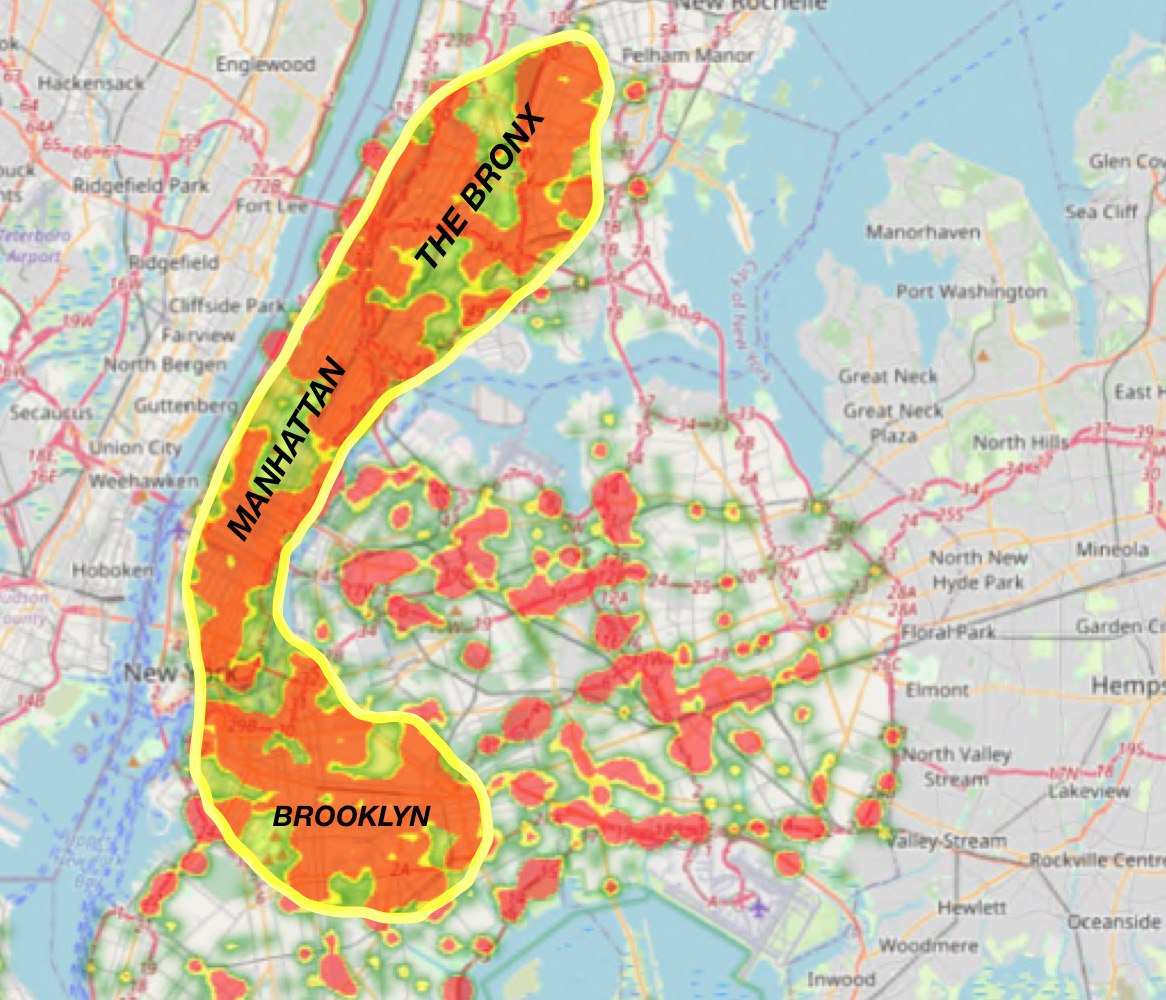
</div>

Based on the `LATITUDE` and `LONGITUDE` coordinates, most of the traffic accidents in New York City occurs in Brooklyn, Manhattan, and The Bronx.

## 2. `Contributing Factor Vehicle` Visualisation

### 2.1 Creating Function for Word Cloud Generation

In [20]:
def generate_word_cloud(d):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        min_font_size = 10,
        max_font_size = 200,
        relative_scaling = 0.4,
        background_color = 'black').generate_from_frequencies(d)
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

### 2.2 Word Cloud Generation of `CONTRIBUTING FACTOR VEHICLE 1`

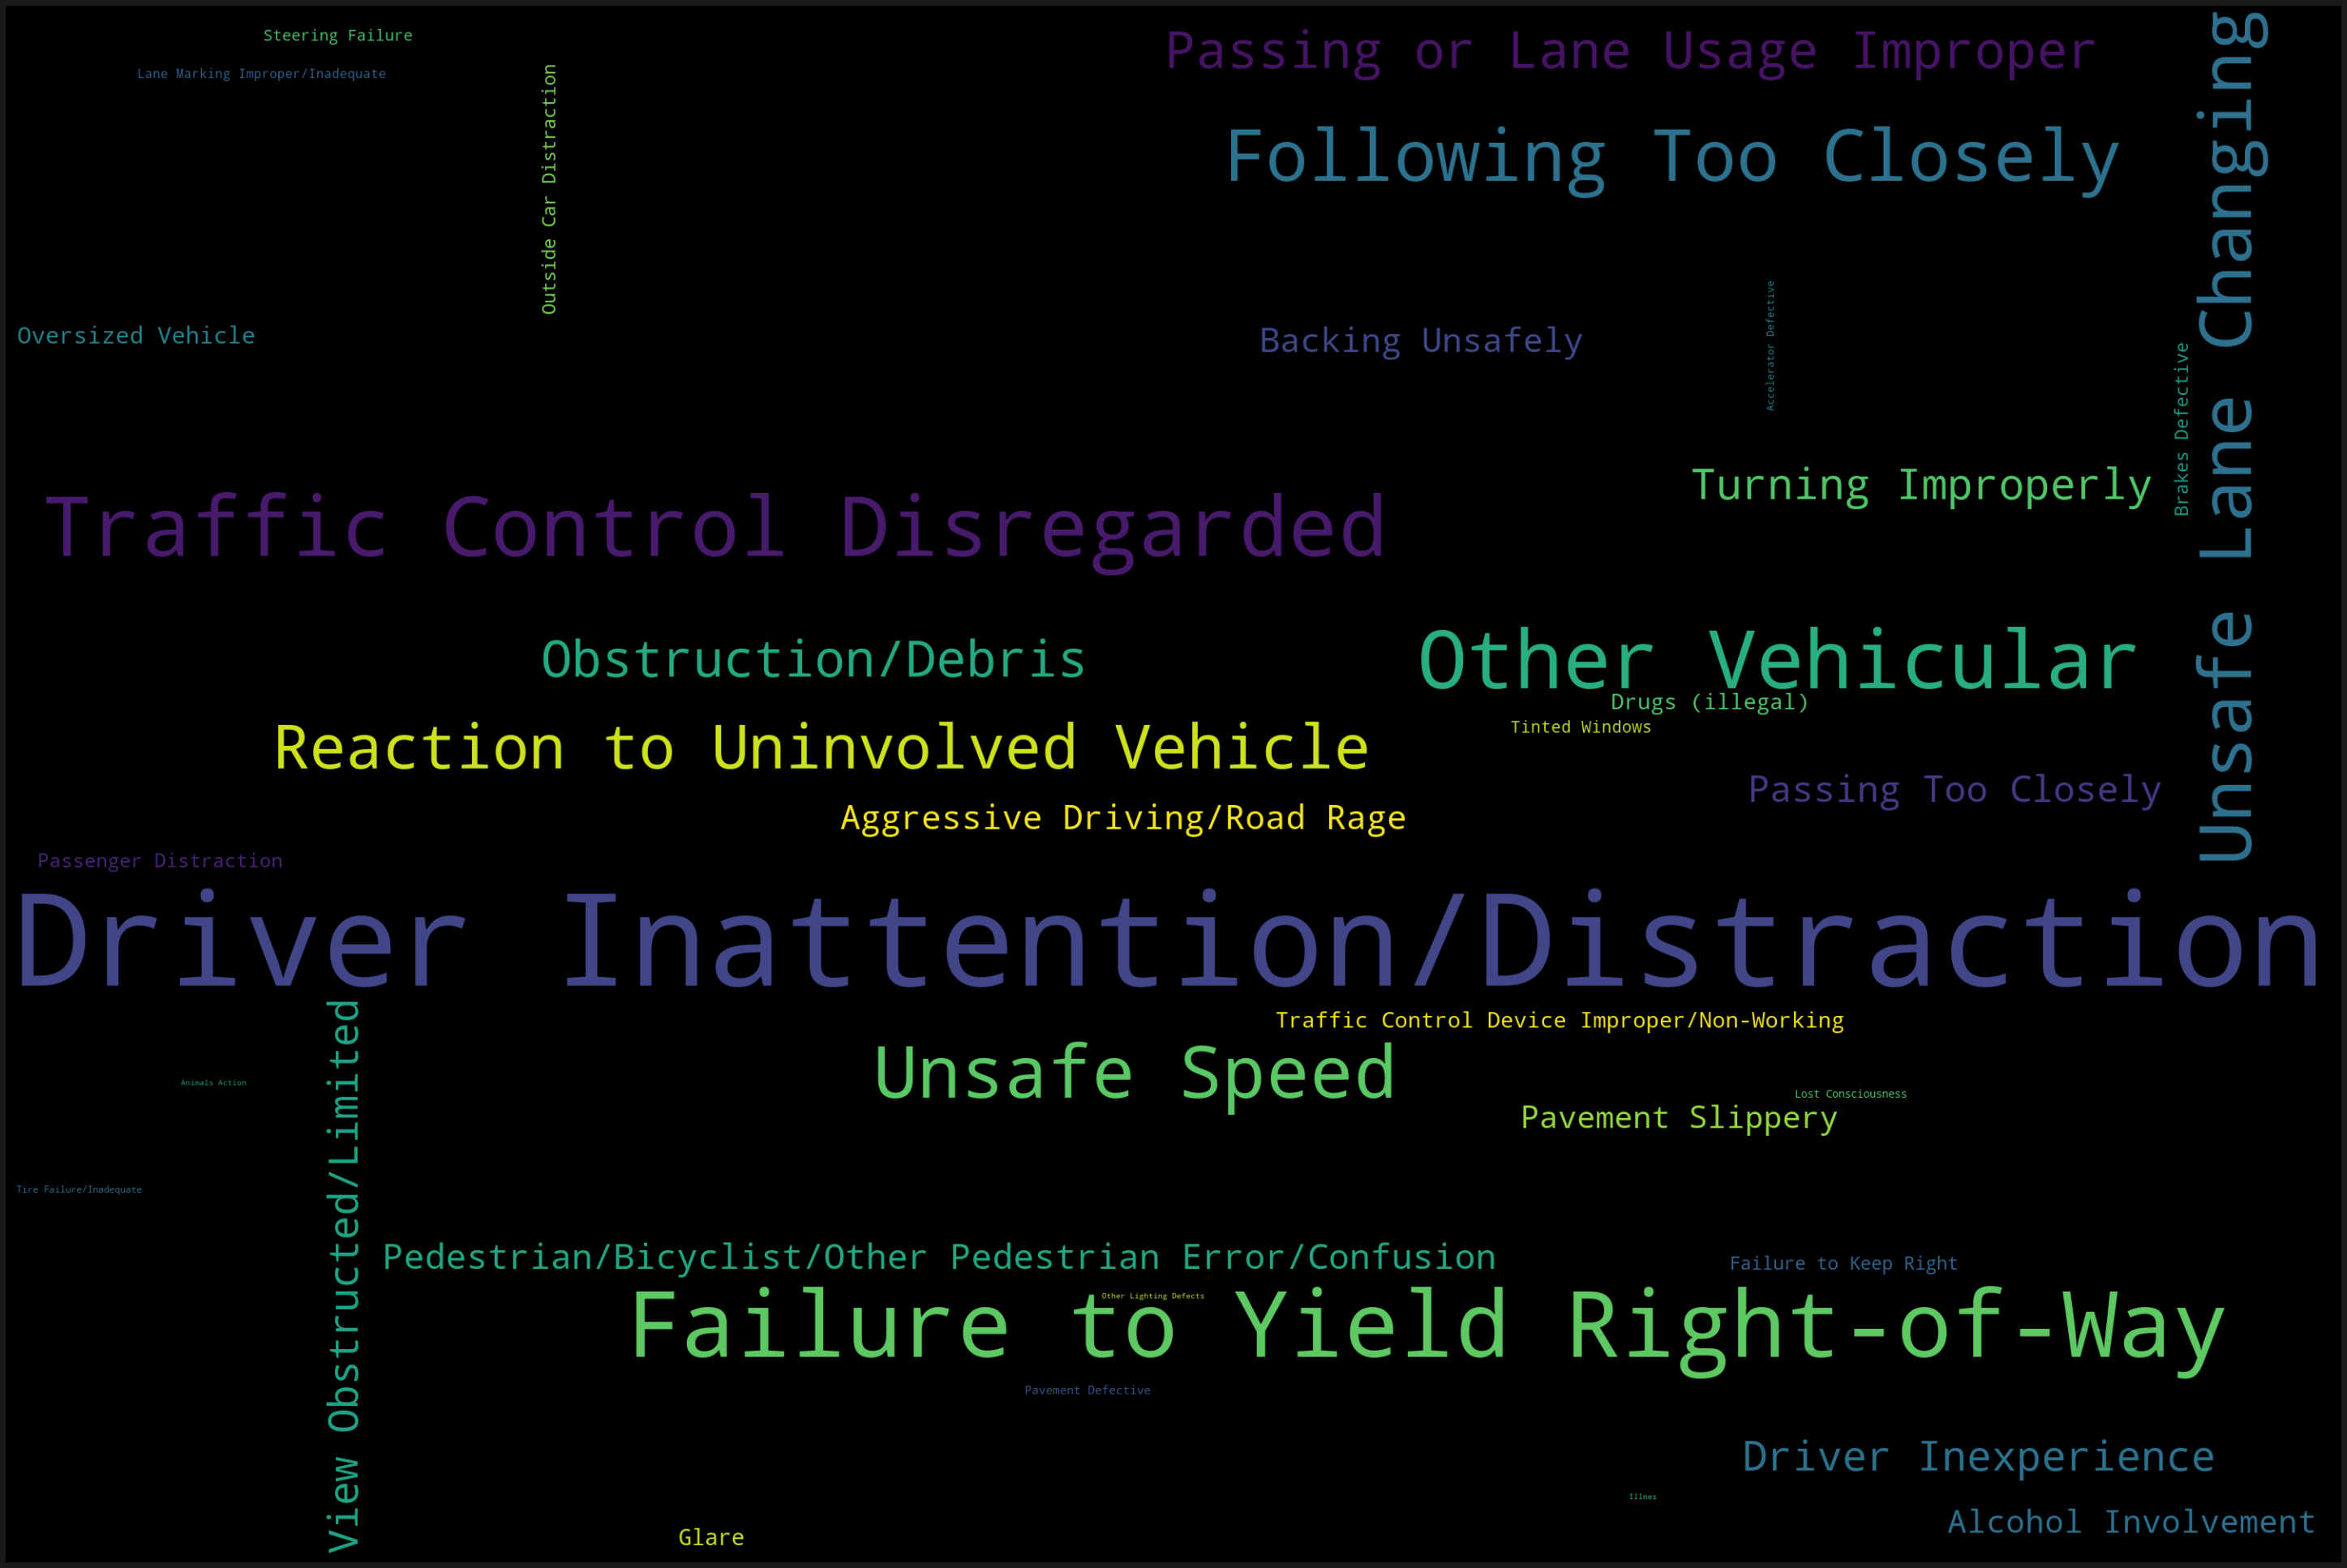

In [21]:
cfv_d1 = dict(Counter(data_resampled_subset["CONTRIBUTING FACTOR VEHICLE 1"]))
generate_word_cloud(cfv_d1)

From the word cloud it can be clearly seen that based on the `CONTRIBUTING FACTOR VEHICLE 1`, the traffic accidents in New York City is mostly caused by `Driver Inattention/Distraction`

### 2.3 Word Cloud Generation of `CONTRIBUTING FACTOR VEHICLE 2`

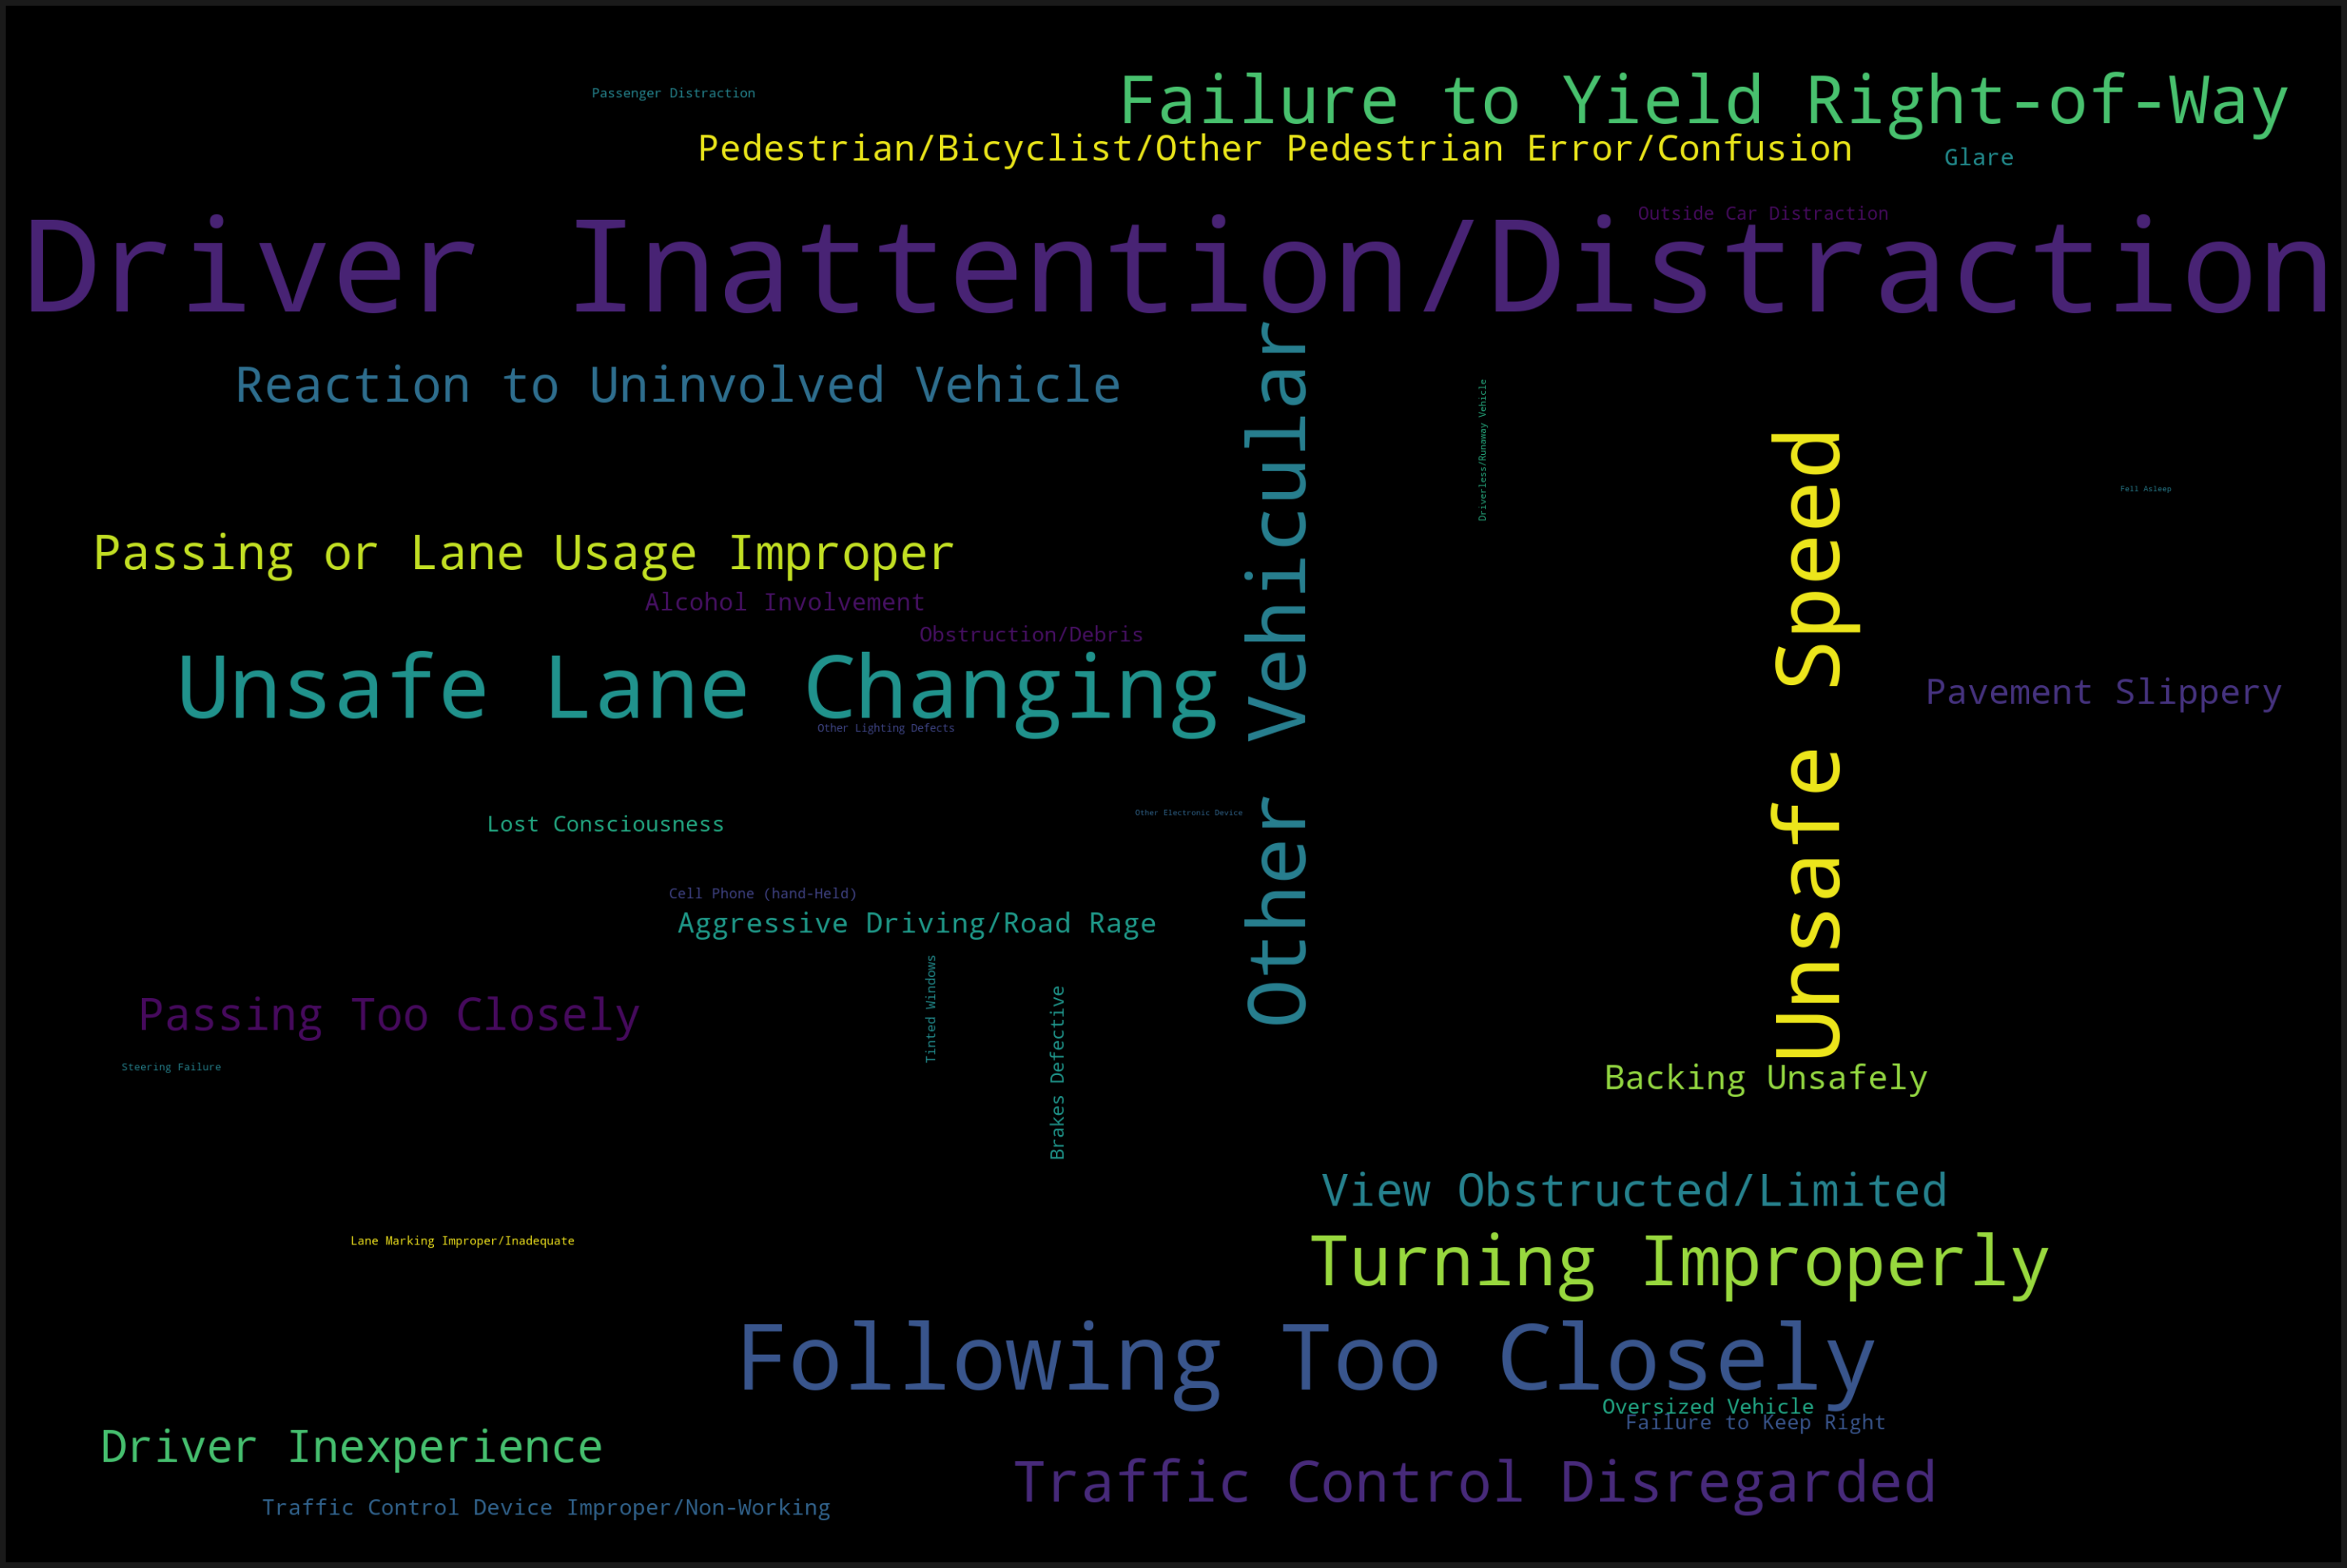

In [22]:
cfv_d2 = dict(Counter(data_resampled_subset["CONTRIBUTING FACTOR VEHICLE 2"]))
generate_word_cloud(cfv_d2)

From the word cloud it can be clearly seen that based on the `CONTRIBUTING FACTOR VEHICLE 2`, the traffic accidents in New York City is mostly caused by `Driver Inattention/Distraction`

## 3. `Crash Date` and `Crash Time` Visualisation

### 3.1 Bar Chart Visualisation of Overall Accidents per WeekDay

In [23]:
data_resampled_subset['day_name'] = data_resampled_subset['CRASH DATE'].dt.day_name()

fig = px.bar(x = data_resampled_subset['day_name'].value_counts().index,
            y=data_resampled_subset['day_name'].value_counts(),
            text=(data_resampled_subset['day_name'].value_counts()/len(data_resampled_subset['day_name'])*100),
            title='Overall No. Of Accidents Per WeekDay')

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})

fig.show()

### 3.2 Converting `Crash Time` Hours to String Labels

In [24]:
data_resampled_subset['CRASH TIME'] = pd.to_datetime(data_resampled_subset['CRASH TIME'])

data_resampled_subset['period'] = (data_resampled_subset['CRASH TIME'].dt.hour % 24 + 4) // 4
data_resampled_subset['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

### 3.3 Pie Chart Visualisation of Accidents in Different Parts of Day

In [25]:
period = data_resampled_subset['period'].value_counts()

fig = px.pie(names = period.index,
            values=period,
            height=450,
            )
fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Pastel2))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'No. of Accidents In Different Part Of Day',
                        'x':0.45,'y':0.9})

fig.show()

### 3.4 Scatter Plot Visualisation of Number of Accidents in Different Parts of Day

In [26]:
data_resampled_subset['Hour'] = data_resampled_subset['CRASH TIME'].dt.hour

ax = data_resampled_subset.groupby('day_name')['Hour'].value_counts().reset_index(name='Count')

fig = px.scatter(ax, x='Hour', y="Count", color='Hour', facet_col="day_name",
                facet_col_wrap=4)

fig.update_yaxes(matches=None)


fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'No. of Accidents In Different Part Of Day',
                        'x':0.45,'y':0.9})

fig.show()

The scatter plot above shows that most of these accidents occur during evening hours.

## 4. `Vehicle Type Code` Visualisation

### 4.1 Creating New DataFrame Containing Frequency of Each Distinct Variable in `VEHICLE TYPE CODE 1`

In [27]:
d1_freqVTC = dict(Counter(data_resampled_subset['VEHICLE TYPE CODE 1'].values))
freqDF1 = pd.DataFrame(list(d1_freqVTC.items()),columns = ['VEHICLE TYPE CODE 1','FREQUENCY']) 
freqDF1.head()

VEHICLE TYPE CODE 1  FREQUENCY
0                                  Bus        171
1                        Pick-up Truck        338
2                                Sedan      15516
3  Station Wagon/Sport Utility Vehicle       6503
4                                 Taxi       1139

### 4.2 Tree Map Visualisation of  `VEHICLE TYPE CODE 1`

In [28]:
px.treemap(data_frame=freqDF1, path=['VEHICLE TYPE CODE 1'], values='FREQUENCY', color='FREQUENCY')

### 4.3 Creating New DataFrame Containing Frequency of Each Distinct Variable in `VEHICLE TYPE CODE 2`

In [29]:
d2_freqVTC = dict(Counter(data_resampled_subset['VEHICLE TYPE CODE 2'].values))
freqDF2 = pd.DataFrame(list(d2_freqVTC.items()),columns = ['VEHICLE TYPE CODE 2','FREQUENCY']) 
freqDF2.head()

VEHICLE TYPE CODE 2  FREQUENCY
0  Station Wagon/Sport Utility Vehicle      10702
1                                Sedan      10842
2                           Motorcycle        177
3                                 Bike        758
4                               E-Bike        155

### 4.4 Tree Map Visualisation of `VEHICLE TYPE CODE 2`

In [30]:
px.treemap(data_frame=freqDF2, path=['VEHICLE TYPE CODE 2'], values='FREQUENCY', color='FREQUENCY')

# Section C: Data Modelling and Machine Learning

(Done By: Francis & Matthew )

## 1. One-Hot Encoding

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

### 1.1 Creating New DataFrame with Encoded String-Contained Variables

In [31]:
# Use pandas' get_dummies to implement one-hot-encoding method
data_encoded = pd.get_dummies(data_resampled_subset,data_resampled_subset.columns[data_resampled_subset.dtypes == 'object'])
data_encoded

CRASH DATE          CRASH TIME   LATITUDE  LONGITUDE  \
0     2020-08-29 2022-11-09 14:00:00  40.704422 -73.792854   
1     2020-08-29 2022-11-09 12:29:00  40.861862 -73.912820   
3     2020-08-29 2022-11-09 19:00:00  40.839680 -73.929276   
4     2020-08-29 2022-11-09 05:40:00  40.858190 -73.884350   
9     2020-08-29 2022-11-09 15:00:00  40.669518 -73.911934   
...          ...                 ...        ...        ...   
49528 2020-02-13 2022-11-09 08:25:00  40.665230 -73.931465   
49529 2020-02-14 2022-11-09 08:40:00  40.854744 -73.923510   
49530 2020-02-14 2022-11-09 08:40:00  40.854744 -73.923510   
49533 2020-02-13 2022-11-09 08:25:00  40.665230 -73.931465   
49534 2020-02-14 2022-11-09 08:40:00  40.854744 -73.923510   

       NUMBER OF PERSONS INJURED  Hour  \
0                              0    14   
1                              2    12   
3                              1    19   
4                              0     5   
9                              0    15   
...                          ...   ...   
49528                          8     8   
49529                          8     8   
49530                          8     8   
49533                          8     8   
49534                          8     8   

       CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective  \
0                                                      0     
1                                                      0     
3                                                      0     
4                                                      0     
9                                                      0     
...                                                  ...     
49528                                                  0     
49529                                                  0     
49530                                                  0     
49533                                                  0     
49534                                                  0     

       CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage  \
0                                                      0            
1                                                      0            
3                                                      0            
4                                                      0            
9                                                      0            
...                                                  ...            
49528                                                  0            
49529                                                  0            
49530                                                  0            
49533                                                  0            
49534                                                  0            

       CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement  \
0                                                      0   
1                                                      0   
3                                                      0   
4                                                      0   
9                                                      0   
...                                                  ...   
49528                                                  0   
49529                                                  0   
49530                                                  0   
49533                                                  0   
49534                                                  0   

       CONTRIBUTING FACTOR VEHICLE 1_Animals Action  ...  day_name_Sunday  \
0                                                 0  ...                0   
1                                                 0  ...                0   
3                                                 0  ...                0   
4                                                 0  ...                0   
9                                                 0  ...                0   

It can be perceived that each distinct data in a variable is expanded to columns and has binary values in it to determine True/False.

### 1.2 Overview and Checking of Variables of `uint8` Data Types

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_encoded.dtypes)

CRASH DATE                                                                             datetime64[ns]
CRASH TIME                                                                             datetime64[ns]
LATITUDE                                                                                      float64
LONGITUDE                                                                                     float64
NUMBER OF PERSONS INJURED                                                                       int64
Hour                                                                                            int64
CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective                                             uint8
CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage                                      uint8
CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement                                               uint8
CONTRIBUTING FACTOR VEHICLE 1_Animals Action                                      

### 1.3 Creating New DataFrame for `uint8` Data Types and `Hour` index

In [33]:
data_encoded_cleaned = data_encoded.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED'])
feature_cols = data_encoded_cleaned.columns

In [34]:
x = data_encoded[feature_cols]
y = data_encoded[['NUMBER OF PERSONS INJURED']]

## 2. Test-Train Split of Data

### 2.1 Creating New Variables for Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state = 25)

### 2.2 Checking of `X` Train and Test Values

In [36]:
X_train.shape, X_test.shape

((19628, 241), (4908, 241))

### 2.3 Checking of `y` Train and Test Values

In [37]:
y_train.shape, y_test.shape

((19628, 1), (4908, 1))

## 3. Random Forest

The Random Forest Classification works by having a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction. 

In our case, the number of trees that we are utilizing is 100, hence `n_estimators = 100` 

### 3.1 Feature Importances

The measurements of importances of the features in the Random Forest Classification problem is based of the Gini Impurity or Information Gain. When we train a tree, we compute how much each feature contributes to decreasing the weighted impurity. We are using `feature_importances_`; this function aims at averaging the decrease in impurity over trees.

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

rf_prob = random_forest.predict_proba(X_test)[::,1]
rf_pred = random_forest.predict(X_test)

In [39]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

importance
feature                                                       
Hour                                                     0.146
period_Morning                                           0.045
CONTRIBUTING FACTOR VEHICLE 2_Driver Inattentio...       0.036
VEHICLE TYPE CODE 2_Sedan                                0.033
VEHICLE TYPE CODE 1_Sedan                                0.033
VEHICLE TYPE CODE 2_Station Wagon/Sport Utility...       0.032
CONTRIBUTING FACTOR VEHICLE 1_Driver Inattentio...       0.031
day_name_Saturday                                        0.029
VEHICLE TYPE CODE 1_Station Wagon/Sport Utility...       0.027
CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield ...       0.027

From this, we are able to see that `Hour` is the most important feature. 

### 3.2 Bar Chart Visualisation for Feature Importances

<AxesSubplot:ylabel='feature'>

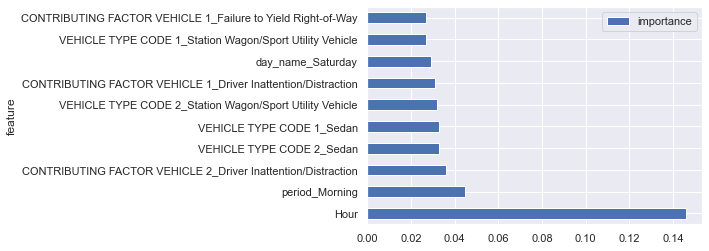

In [40]:
importances[0:10].plot.barh()

### 3.3 Confusion Matrix for Random Forest

We can use a confusion matrix to show the correct and incorrect predictions in order to evaluate the effectiveness of our model.

Text(0.5, 39.5, 'Predicted')

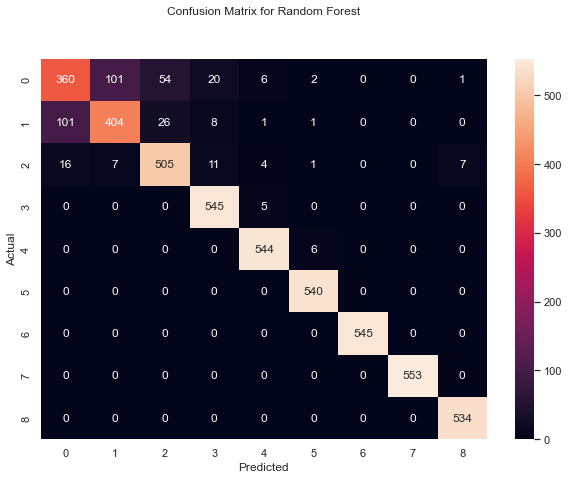

In [41]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_rf, annot=True, fmt = 'g')

plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### 3.4 Metrics of Random Forest Based On Confusion Matrix

Metrics are used to quantify the quality of a model's predictions.  

>`Accuracy Score` = (True Posititve + True Negative) / Total

>`Balanced Accuracy Score` = 0.5 * (True Positive Rate + True Negative Rate)

>`Precision Score` = True Positive / Actual Results OR True Posititve / (True Positive + True Negative) 

>`Recall Score` = True Posititve / Predicted Results OR True Positive / (True Positive + False Negative) 


In [42]:
print("Accuracy: ",metrics.accuracy_score(y_test, rf_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,rf_pred))
print("Precision: ",metrics.precision_score(y_test, rf_pred, average='micro'))
print("Recall: ",metrics.recall_score(y_test, rf_pred, average='micro'))

rfAccuracy = metrics.balanced_accuracy_score(y_test,rf_pred)

Accuracy:  0.9229828850855746
Balanced Accuracy Score:  0.9227828202130581
Precision:  0.9229828850855746
Recall:  0.9229828850855746


## 4. Decision Tree

Decision Tree Classifier is a supervised machine learning technique for inducing a decision tree from training data. A decision tree is a predictive model which is a mapping from observations about an item to conclusions about its target value. 

### 4.1 Decision Tree Classifier and Plotter Using Default Parameters

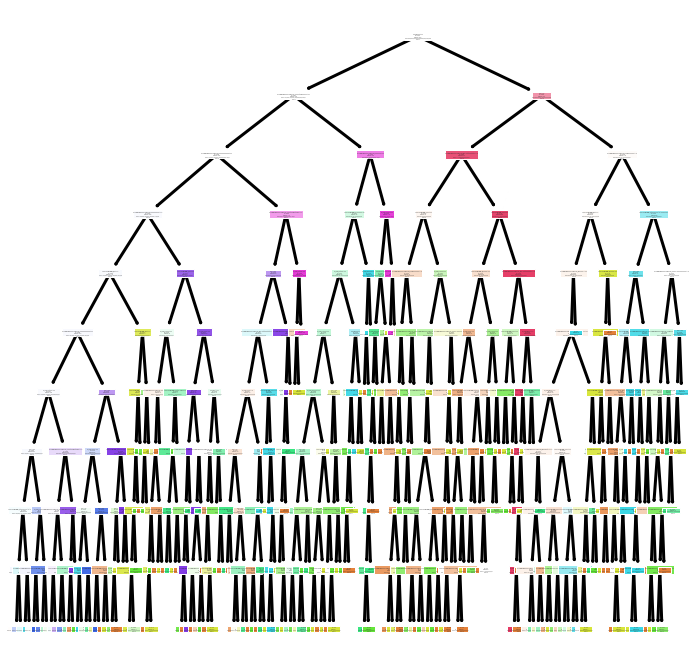

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6239046260444263

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6020782396088019



<AxesSubplot:>

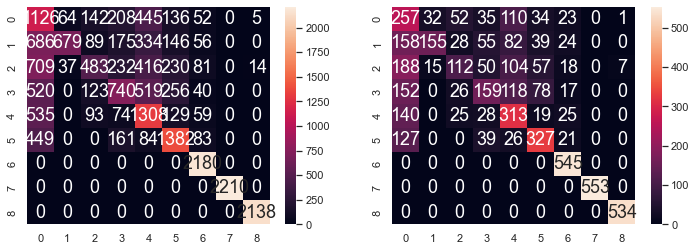

In [43]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                     # train the decision tree model



fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### 4.2 Tuning the Parameters of the Decision Tree Classifier

To optimise the Decision Tree Classifier and improve the classfication accuracy, we can look at the parameters of the model and find a combination that will produce the best results. In this project, we will be focusing on three main parameters of the Decision Tree Classifier- max_depth, min_samples_split and min_samples_leaf.

The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

   max_depth Accuracy (Train Data) Accuracy (Test Data)
0       10.0              0.623905             0.602486
1       11.0              0.658141             0.635086
2       12.0              0.684532             0.661369
3       13.0              0.717546             0.688875
4       14.0              0.748217             0.721271
5       15.0              0.770124             0.737164
6       16.0              0.800795              0.76793
7       17.0              0.826523             0.789935
8       18.0              0.849908             0.808068
9       19.0              0.868402              0.81846
10      20.0              0.881598             0.834148
11      21.0              0.896933             0.848207
12      22.0              0.909976             0.856153
13      23.0              0.923222             0.865933
14      24.0              0.934481             0.884271
15      25.0              0.942225             0.888753
16      26.0               0.94839             0

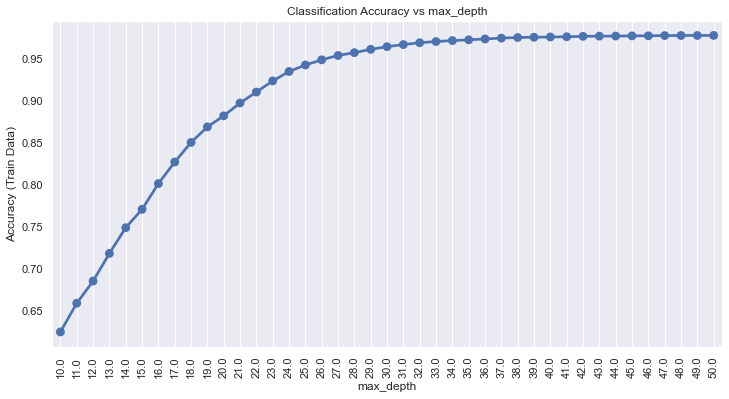

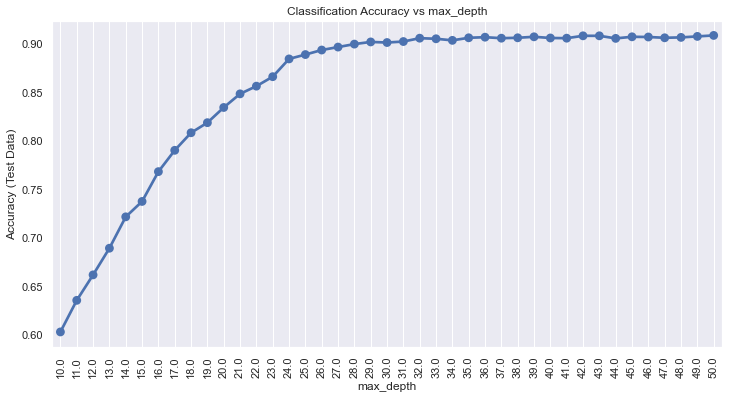

In [44]:
# To find the optimal value of max_depth, we test the accuracy for the model when max_depth ranges from 10 to 50.
c_parameter_name = 'max_depth'
c_parameter_values = []
for i in range(10,51):
    c_parameter_values.append(i)
accuracy = pd.DataFrame(columns=[c_parameter_name, 'Accuracy (Train Data)', 'Accuracy (Test Data)'])

# Here, we create a loop to test the accuracy of the model with different values of max_depth.
# Important Note: we only specify the max_depth and random_state values and set the rest of the parameters to default values in this model. 
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(max_depth=input_parameter, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acctr_score = model.score(X_train, y_train)
    accte_score = model.score(X_test, y_test)
    accuracy = accuracy.append({c_parameter_name : input_parameter , 'Accuracy (Train Data)' : acctr_score, 'Accuracy (Test Data)' : accte_score}, ignore_index=True)
    
print(accuracy)
print("")
plt.figure(figsize=(12,6))
sb.pointplot(x=c_parameter_name, y="Accuracy (Train Data)", data=accuracy)
title = 'Classification Accuracy vs ' + c_parameter_name 
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

plt.figure(figsize=(12,6))
sb.pointplot(x=c_parameter_name, y="Accuracy (Test Data)", data=accuracy)
title = 'Classification Accuracy vs ' + c_parameter_name 
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

Here, we can derive the optimal value of `max_depth` by looking at which model has the higgest accuracy rates using test data. While the accuracy for the models using train data is also important, we can see that it will never decrease as `max_depth` increases, and will continue to increase up to accuracy values of 1 where we might face a problem of over-fitting. Thus, we place more importance on the accuracy of the models using test data. 

As commented in the code above, we set the rest of the parameters (apart from `max_depth`) to default values in our model. 

To improve the accuracy of our Decision Tree Classifier even more, we can tune other parameters such as `min_samples_split` and `min_samples_leaf`. 

> `min_samples_split` : int, float, optional (default=2)
* The minimum number of samples required to split a node. If this parameter is set as 20 and if a node includes samples less than 20, it means this is the last node (which means terminal node or leaf) and it is not splittable anymore.

> `min_samples_leaf` : int, float, optional (default=1)
* The minimum number of samples required to be at a leaf node. 

<b>Implementing GridSearchCV</b>

In order to find the best model with the optimal value for these three parameters, we use GridSearchCV which performs an exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### 4.3 Best Decision Tree Classifier Model using 5-Fold Cross Validation

<b>Implementing 5-fold cross validation using GridSearchCV and StratifiedKFold</b>

Cross validation works by splitting our dataset into random groups, holding one group out as the test, and training the model on the remaining groups. This process is repeated for each group being held as the test group, then the average of the models is used for the resulting model.

![kfoldtest.png](kfoldtest.png)

In order to find the best model with the optimal value for these three parameters, we use GridSearchCV which performs an exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

DecisionTreeClassifier(max_depth=39, random_state=42)


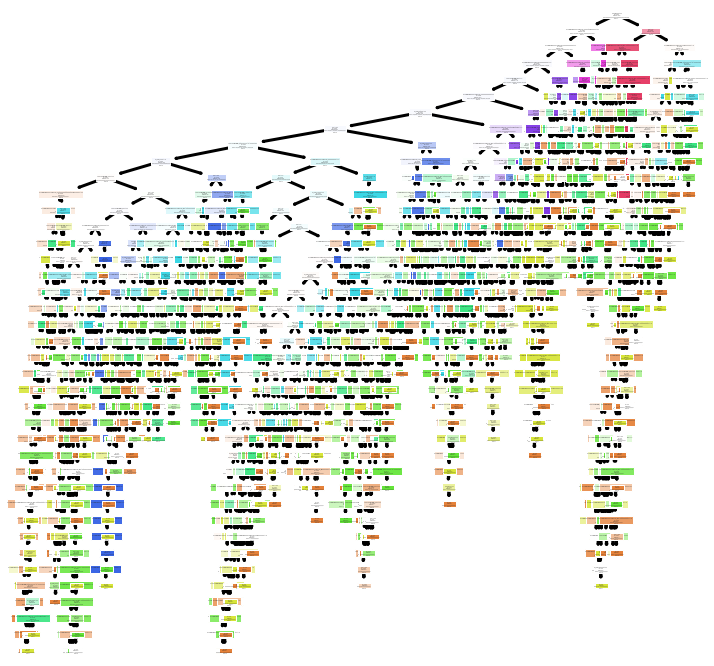

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9752904014672916

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9070904645476773



<AxesSubplot:>

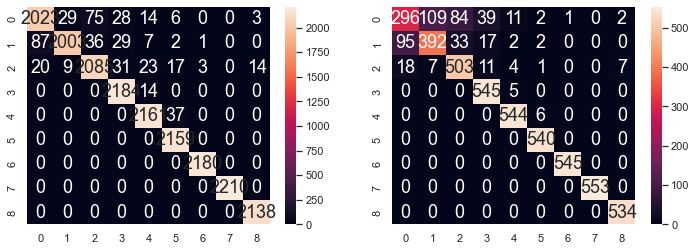

In [45]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=268)
param_grid = {'max_depth': np.arange(10,51),
              'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,21,2),
              'random_state' : [42]}

#create a grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
grid_tree.fit(X_train, y_train)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)

best_tree.fit(X_train, y_train)     

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(best_tree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in best_tree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", best_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", best_tree.score(X_test, y_test))
print()

dtAccuracy = best_tree.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## 5. XGBoost

In [46]:
xgb_classifier = xgb.XGBClassifier()

In [47]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [48]:
predictions = xgb_classifier.predict(X_test)

In [49]:
predictions

array([3, 4, 7, ..., 4, 5, 3], dtype=int64)

Accuracy of Test Model: 0.854319478402608


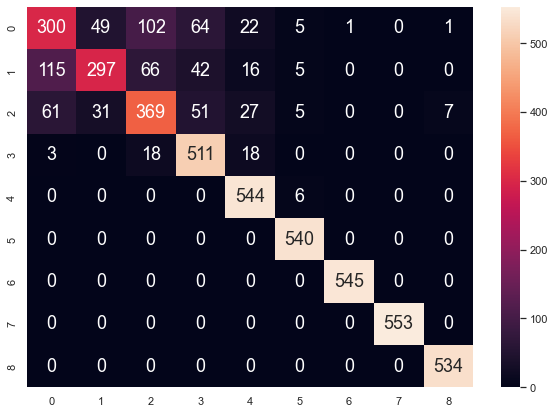

In [50]:
xgbAccuracy = accuracy_score(y_test,predictions)

f, axes = plt.subplots(1, figsize=(10, 7))
sb.heatmap(confusion_matrix(y_test, predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18},)

print("Accuracy of Test Model:",accuracy_score(y_test,predictions))

## 6. Gaussian Naive Bayes

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

Gaussian Naive Bayes is an extension of the Naive Bayes Theorem. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because it aids to estimate the mean and standard deviation from the training data.

In [51]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_prob = nb.predict_proba(X_test)[::,1]

In [52]:
nb_pred = nb.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, nb_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,nb_pred))
print("Precision: ",metrics.precision_score(y_test, nb_pred, average='micro'))
print("Recall: ",metrics.recall_score(y_test, nb_pred, average='micro'))

nbAccuracy = metrics.balanced_accuracy_score(y_test,nb_pred)

Accuracy:  0.5330073349633252
Balanced Accuracy Score:  0.5340327086933413
Precision:  0.5330073349633252
Recall:  0.5330073349633252


Text(0.5, 39.5, 'Predicted')

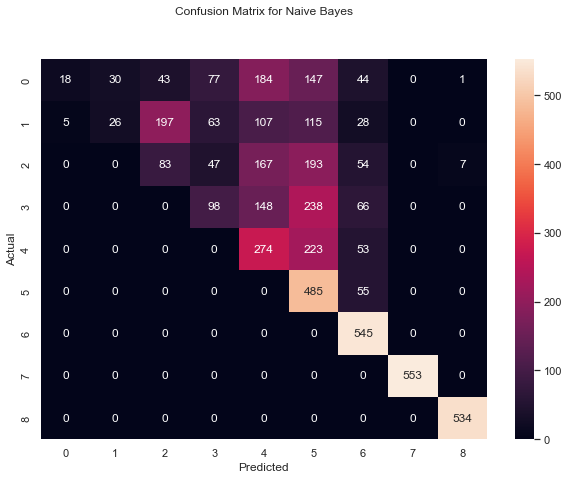

In [53]:
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_nb, annot=True, fmt = 'g')

plt.title('Confusion Matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## 7. Comparison of Machine Learning Methods

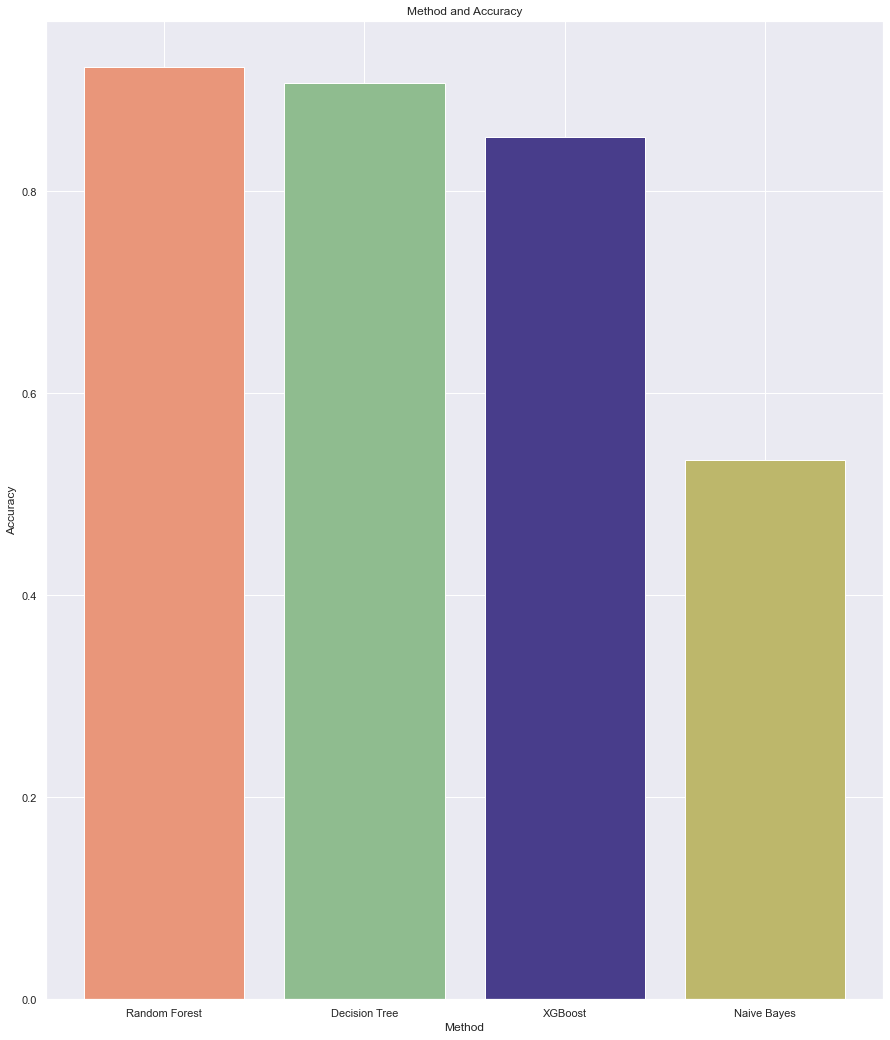

Accuracy of Random Forest:  0.9227828202130581
Accuracy of Decision Tree:  0.9070904645476773
Accuracy of XGBoost:  0.854319478402608
Accuracy of Naive Bayes:  0.5340327086933413


In [54]:
method = ['Random Forest', 'Decision Tree', 'XGBoost', 'Naive Bayes']
accuracy = [rfAccuracy, dtAccuracy, xgbAccuracy, nbAccuracy]

New_Colors = ['#E9967A','#8FBC8F','#483D8B','#BDB76B']
plt.figure(figsize=(15,18))
plt.bar(method, accuracy, color=New_Colors)
plt.title('Method and Accuracy')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.show()

print("Accuracy of Random Forest: ", rfAccuracy)
print("Accuracy of Decision Tree: ", dtAccuracy)
print("Accuracy of XGBoost: ", xgbAccuracy)
print("Accuracy of Naive Bayes: ", nbAccuracy)

Random Forest Classification tends to do better than the Decision Tree Classification and XGBoost Classifier, although by a small margin, but does way better than Gaussian Naive Bayes Classification. It can be said that Random Forest Classification, Decision Tree Classification, and XGBoost Classifier are optimal models to predict the outcome, but Random Forest is the most preferred.

The Naive Bayes Model did not do well because our variables are mostly one-hot-encoded, which are not Gaussian-distributed. Naive Bayes has a naive assumption of conditional independence for every predictor, which might not be the case in reality.

In conclusion, our best classification method is the Random Forest Classification. It is possible to predict the ``NUMBER OF PERSONS INJURED`` in a road accident in New York City, with the variables `CONTRIBUTING FACTOR VEHICLE 1`,`CONTRIBUTING FACTOR VEHICLE 2`, `VEHICLE TYPE CODE 1`, and `VEHICLE TYPE CODE 2`.

# Section D: Closing

(Done by: Muh. Afiq & Nigel)

## 1. Conclusion and Recommendations

* The 5 most important features in predicting the `NUMBER OF PERSONS INJURED` (in decreasing order):
   1. `Hour` - Time of Accident
   2. `CONTRIBUTING FACTOR VEHICLE 2` - Contributing factor of the secondary cause of accident
   3. `VEHICLE TYPE CODE 2` - Vehicle type of the secondary cause of accident
   4. `VEHICLE TYPE CODE 1` - Vehicle type of the primary cause of accident
   5. `CONTRIBUTING FACTOR VEHICLE 1` - Contributing factor of the primary cause of accident 
   
 
* We used four different models, and Random Forest Classification outperformed Decision Tree Classification, XGBoost Classification, and Gaussian Naive Bayes Classification in order of performance.


* For our specific issue statement, we acknowledge the constraints of our dataset and predictors.

## 2. Project Workload Allocation

Section A: Data Preparation (Francis & Matthew)

Section B: Data Visualisation (Muh. Afiq & Nigel)

Section C: Data Modelling and Machine Learning (Francis & Matthew)

Section D: Closing (Muh. Afiq & Nigel)